In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import datasets
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning

from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models

from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor  # ensemble methods for regression
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error

from sklearn import preprocessing  # for data preprocessing and scaling

import warnings

warnings.filterwarnings('ignore')
# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety - to już znamy
# Dla uproszczenia wybieramy tylko cechę trzecią i czwartą, tj długość i szerokość płatków
X = iris.data[:, [2, 3]]
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
# Jak dotąd jest podobnie do Laboratorium 2
kmn = KMeans(n_clusters=3)
kmn2 = PCA(n_components=3)

# Uczymy klasyfikator na danych treningowych
# Pierwsza różnica - uczenie przebiega bez nadzoru
# To znaczy nie pokazujemy klasyfikatorowi prawidłowych klas - gatunków kwiatów
# Zgodnie z konfiguracją wcześniej - powiedzieliśmy tylko że chcemy w zbiorze znaleźć 3 klasy
# Dokładny opis algorytmu: https://scikit-learn.org/stable/modules/clustering.html#k-means
kmn.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[1 2 2 0 0 1 0 0 2 2 0 2 0 2 0 1 1 0 1 0 2 1 1 1 1 1 2 1 1 1 0 1 0 1 1 0 0
 0 2 0 2 0 1 1 0 2 1 2 0 1 0 1 2 0 2 2 1 0 0 2 1 0 2 0 2 1 2 0 2 1 2 1 1 0
 2 1 2 1 2 0 1 1 0 2 2 1 2 2 2 1 2 1 2 0 0 2 1 2 2 1 0 1 2 0 2]


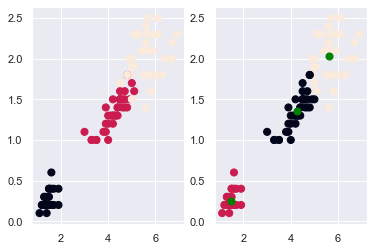

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_train)
# Wyciągamy punkty centralne klastrów - pokażemy je na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=50)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='green', s=50)
plt.show()

# Różnice kolorów pomiędzy wykresami są nieistotne

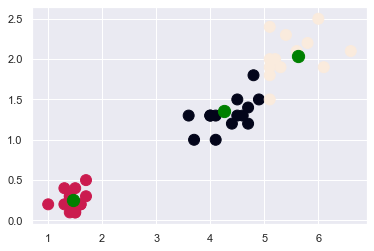

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=120)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='green', s=150)
plt.show()

In [7]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze


from sklearn.datasets import fetch_openml

samochody = fetch_openml('cars1')
samochody.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [8]:
print(samochody.DESCR)

cars1-pmlb

Downloaded from openml.org.


In [9]:


samo = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])
samo.head()



,MPG,cylinders,cubicInches,horsepower,weightLbs,time-to-sixty,year
0,14.0,4.0,350.0,165.0,4209.0,12.0,1972.0
1,31.9,1.0,89.0,71.0,1925.0,14.0,1980.0
2,17.0,4.0,302.0,140.0,3449.0,11.0,1971.0
3,15.0,4.0,400.0,150.0,3761.0,10.0,1971.0
4,30.5,1.0,98.0,63.0,2051.0,17.0,1978.0


In [10]:
print(samo.columns)
print(samo.year)

# doklejenie informacji zuzyciu paliwa do reszty dataframe
samo['MPG'] = np.array(list(samo['MPG']))

Index(['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs',
       'time-to-sixty', 'year'],
      dtype='object')
0      1972.0
1      1980.0
2      1971.0
3      1971.0
4      1978.0
5      1980.0
6      1974.0
7      1971.0
8      1980.0
9      1982.0
10     1983.0
11     1981.0
12     1975.0
13     1974.0
14     1981.0
15     1980.0
16     1980.0
17     1971.0
18     1973.0
19     1971.0
20     1981.0
21     1978.0
22     1977.0
23     1980.0
24     1981.0
25     1977.0
26     1972.0
27     1976.0
28     1977.0
29     1982.0
        ...  
362    1983.0
363    1975.0
364    1981.0
365    1980.0
366    1971.0
367    1971.0
368    1973.0
369    1976.0
370    1973.0
371    1975.0
372    1979.0
373    1973.0
374    1983.0
375    1973.0
376    1972.0
377    1973.0
378    1977.0
379    1981.0
380    1972.0
381    1978.0
382    1980.0
383    1973.0
384    1978.0
385    1982.0
386    1972.0
387    1978.0
388    1974.0
389    1971.0
390    1979.0
391    1983.0
Name: year, Length: 39

In [12]:
print ("Statystki wagi zbioru danych pojazdów:\n")
print ("Waga minimalna: {}".format(np.min(samo.weightLbs)))
print ("Waga maksymalna: {}".format(np.max(samo.weightLbs)))
print ("Waga srednia: {}".format(np.mean(samo.weightLbs)))
print (" mediana wag {}".format(np.median(samo.weightLbs)))
print ("odchylenie standardowe wag: {}".format(np.std(samo.weightLbs)))
print ("Pierwszy kwartyl wag: {}".format(np.percentile(samo.weightLbs, 25)))
print ("Drugi kwartyl: {}".format(np.percentile(samo.weightLbs, 75)))

Statystki wagi zbioru danych pojazdów:

Waga minimalna: 1613.0
Waga maksymalna: 5140.0
Waga srednia: 2977.5841836734694
 mediana wag 2803.5
odchylenie standardowe wag: 848.3184465698362
Pierwszy kwartyl wag: 2225.25
Drugi kwartyl: 3614.75


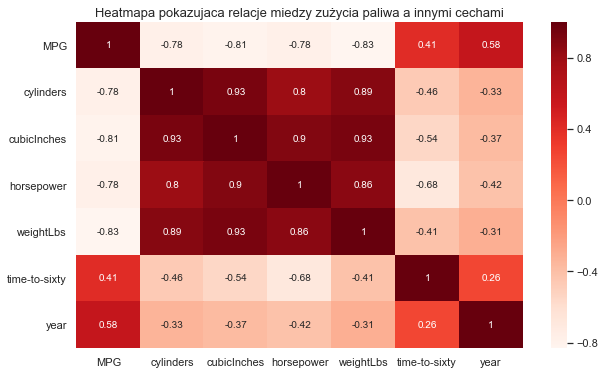

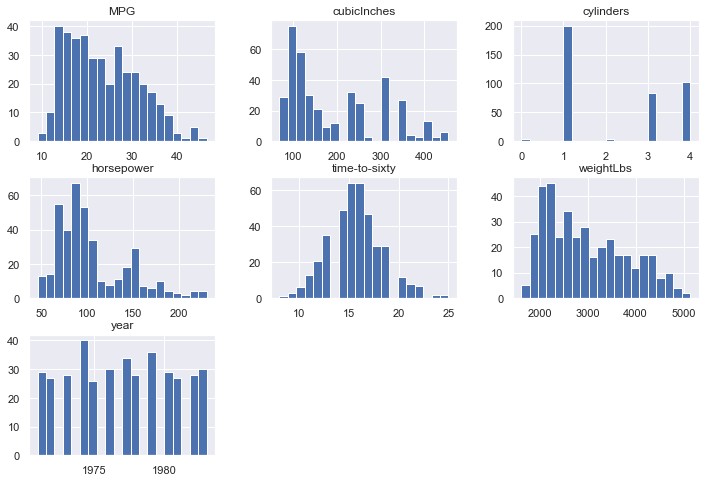

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(samo.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmapa pokazujaca relacje miedzy zużycia paliwa a innymi cechami',
         fontsize=13)
plt.show()



#histogramy roznych cech zbioru cars1
samo.hist(figsize=(12,8),bins=20)
plt.show()

In [14]:
# create a DataFrame of independent variables
#y = samo.data   # create a series of the dependent variable
y = samo.MPG
X=samo.drop(columns=['MPG'])

# the independent variables are not of the same scale so we scale them 
# this is only neccessary for the LinearRegression,Ridge and Lasso models
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

model = LinearRegression()  # initialize the LinearRegression model
model.fit(X_train,y_train)  # we fit the model with the training data

# przewidywanie 
y_pred = model.predict(X_test)

TypeError: '(slice(None, None, None), 0)' is an invalid key

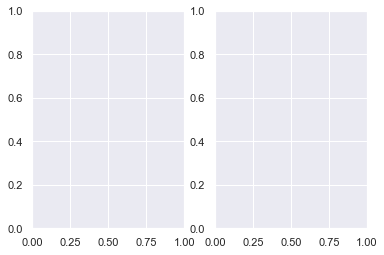

In [16]:
fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
#plt.scatter(X_train[:, 0], xyz[:,1], c=xyz[:,2])
#ax[0].scatter(X_train[:, 0], X_train[:, 1], 1, s=20)
#$ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=np.asarray(y_train), s=20)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
#y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='green', s=50)
plt.show()

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=120)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='green', s=150)
plt.show()

ValueError: Incorrect number of features. Got 6 features, expected 2

In [19]:
from sklearn.datasets import fetch_openml

samochody = fetch_openml('cars1')

dataset = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])

X = dataset.iloc[:,:7].values

X = pd.DataFrame(X)

X = X.apply(pd.to_numeric, axis=1)

X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

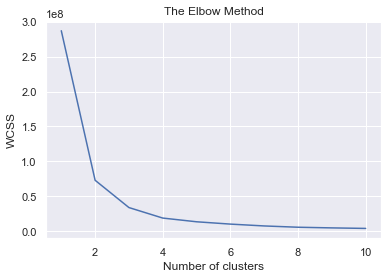

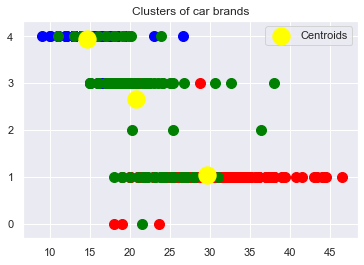

In [20]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red')#,label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue')#,label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green')#,label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()